# Polynomial Linear Regression

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [259]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)  ## this is a quaratic equation...
# quadratic equation used- y=0.5x^2+1.5x+2+outliers .....

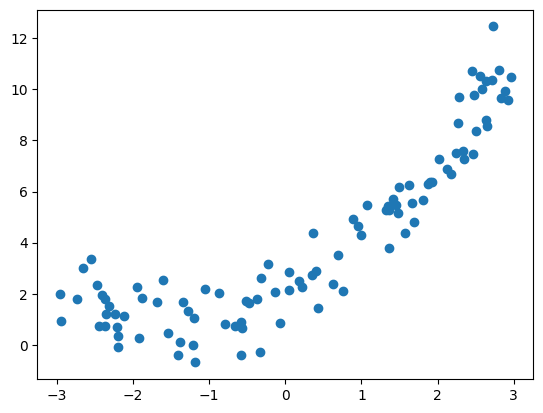

In [260]:
plt.scatter(X,y)

In [261]:
## Train Test split....

from sklearn.model_selection import train_test_split

In [262]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [263]:
## Applying simple linear regression...

from sklearn.linear_model import LinearRegression

regressionLR = LinearRegression()

In [264]:
regressionLR.fit(X_train,y_train)

LinearRegression()

In [265]:
from sklearn.metrics import r2_score

score=r2_score(y_test,regressionLR.predict(X_test))
print(score)

## An R-squared score of 0.6618 (approximately) means that 66.18% of the variance in the dependent variable is explained by the independent variables in your model...
## So our model gives low accuracy...because we used linear regression on Quadratic equation(non linear)...
## the r square value may change on each run...because the value of X changes on each run...

0.7590279753039089


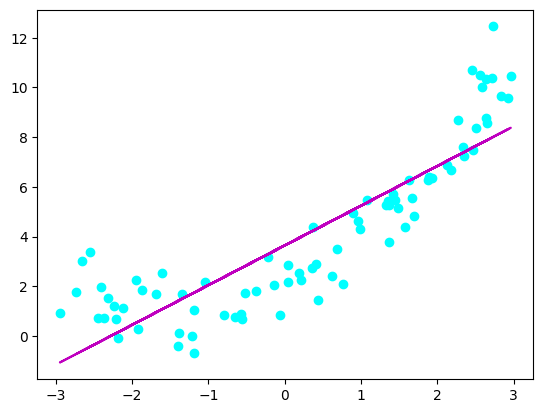

In [266]:
## lets visualize our model...

plt.plot(X_train,regressionLR.predict(X_train),color='m')  ## this is the best fit line(plot of X and y-hat)...
plt.scatter(X_train,y_train,color='#00FFFF')  ## this is the plot of X and y ....

In [267]:
## Lets apply Polynomial Transformation...

from sklearn.preprocessing import PolynomialFeatures

In [268]:
poly = PolynomialFeatures(degree=2,include_bias=True)
## include_bias (default=True) : If True, includes a bias (intercept) term (a column of ones).

poly

PolynomialFeatures()

In [269]:
## transforming...

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [270]:
## Applying linear regression on polynomial features...

from sklearn.metrics import r2_score

regression = LinearRegression()
regression.fit(X_train_poly, y_train)
## Here we are still using Linear Regression, but now it's applied to transformed polynomial features, which allows it to capture nonlinear patterns!..


y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)

print(score)

## now we can see that the accuracy have improved...

0.9418915999477794


In [271]:
print(regression.coef_)  ## here we will get 3 coefficients for 'X^0' , 'X^1' and 'X^2' ...

[[0.         1.47040522 0.50705433]]


In [272]:
print(regression.intercept_)

[2.03078629]


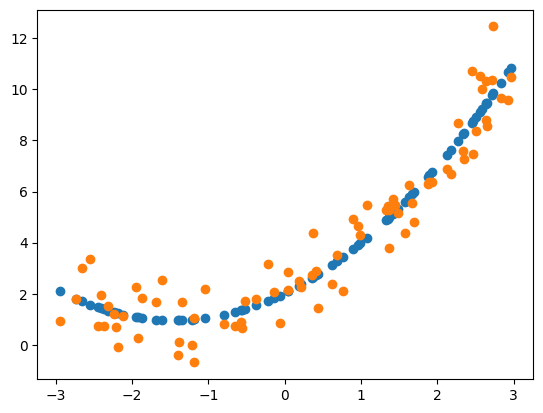

In [273]:
plt.scatter(X_train,regression.predict(X_train_poly))  ## best fit curve...
plt.scatter(X_train,y_train)  ## original points...

In [293]:
## now making the degree value 3...

poly = PolynomialFeatures(degree=3,include_bias=True)

poly

PolynomialFeatures(degree=3)

In [294]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [295]:
from sklearn.metrics import r2_score

regression = LinearRegression()
regression.fit(X_train_poly, y_train)


y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)

print(score)

## changing the degree we can see that the accuracy increased minutely, so we can consider degree as '2'...

0.9419438445178234


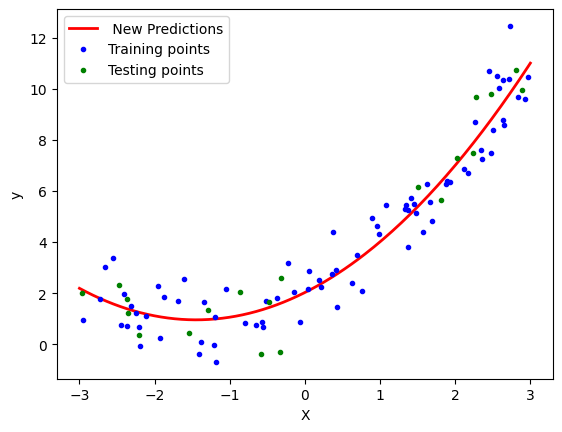

In [298]:
## Prediction of new dataset...

X_new = np.linspace(-3, 3, 200).reshape(200, 1) ##This line generates 200 evenly spaced values between -3 and 3 and reshapes them into a 2D array with 200 rows and 1 column...
X_new_poly = poly.transform(X_new)  ## This line transforms the new input data into polynomial features...

y_new = regression.predict(X_new_poly) ## This line uses the trained regression model to predict the output values for the transformed new input data...

plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Concepts

In [299]:
from sklearn.pipeline import Pipeline

In [305]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)  ## input features...
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) 
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

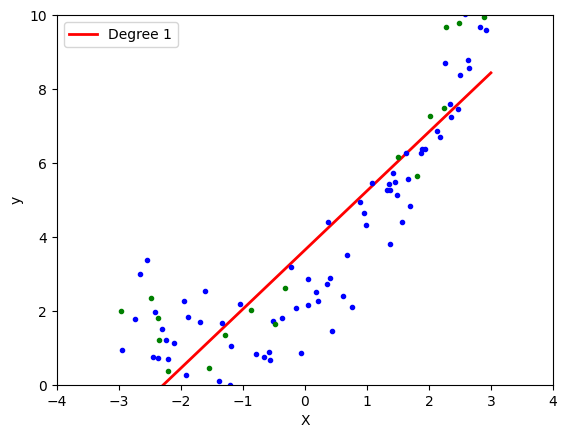

In [306]:
poly_regression(1)

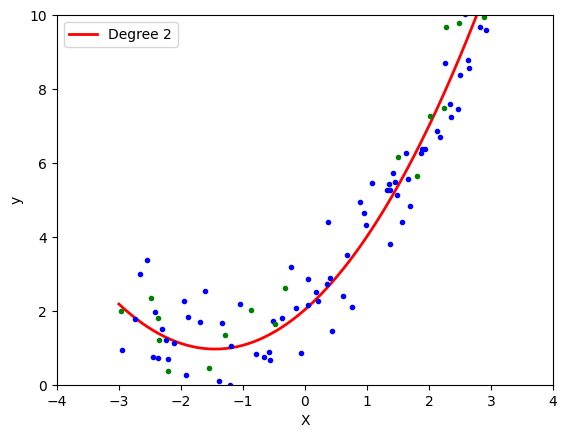

In [307]:
poly_regression(2)

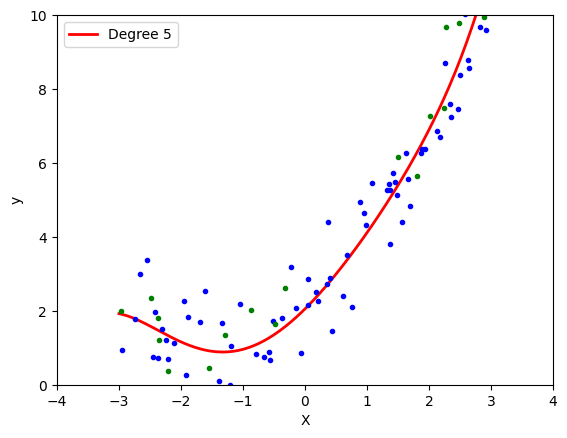

In [308]:
poly_regression(5)

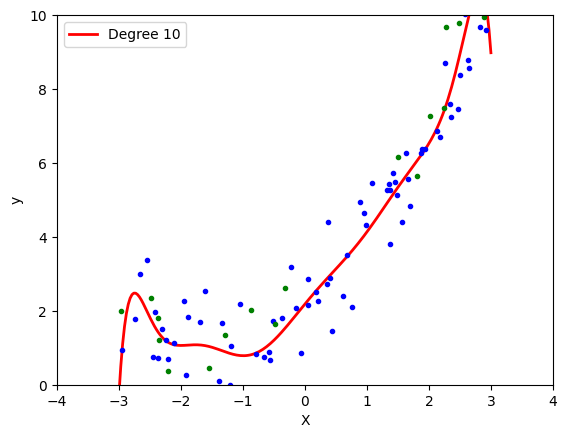

In [309]:
poly_regression(10)